# Data Preprocessing

2. Cleaning Data
    - Data Format
        - Fips cleaning
        - Fips merging
        - Drop geo_value that doesn't have 37 of time_value (majority value of this dataset). -> In case, we use all data to build panal data model.
    - Data Types
        - time_value -> object to timestamp
        - geo_value -> dtype = string
    - Outlier
        - No action -> due to all extream values seem make sense.
    - Distribution
        - No action -> Run regression check the nomality of residual.
        - ML models don't require normality on feature.
    - Null
        - Normal Dist -> Avg
        - Ske -> Median
    - Correlation
        - No action because most features have high VIF -> Apply lesso, Ridge, ElasticNet to solve this problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from pandas.api.types import CategoricalDtype

MIN_NUM_GEO_VAL = 10
PERCENT_ENTITY_NULL = 0.2

In [2]:
dtype = {"geo_value":"str"}
df = pd.read_csv("train_dataset.csv", dtype=dtype)

display(df.head(3))
print("Shape: ", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
0,2021-01-07,1000,34.412959,12.541558,1.464798,54.340471,65.771681,22.086274,52.854667,29.288429,30.487852,57.334785,3.244379,2.6382,28.469582,18.571266,9.482316,24.962112,84.311759,12.627098
1,2021-01-07,1003,32.814153,10.189340,1.270183,64.989475,61.516584,25.179399,51.160278,NaN,28.384842,53.172285,1.199572,NaN,27.532881,23.406516,8.933682,28.864558,82.778220,11.727249
2,2021-01-07,1015,35.621311,14.591271,6.594649,46.390950,NaN,NaN,54.503711,NaN,37.003522,NaN,3.890709,NaN,NaN,20.974363,NaN,NaN,NaN,13.255336


Shape:  (16494, 20)


### Data Format

In [3]:
# Inconsistant geo_value (4 digits) -> drop
# Insufficient geo_value (ending with 000) -> drop
df['count_geo_value'] = df['geo_value'].apply(lambda x : len(x))
df = df[df['count_geo_value']==5].reset_index(drop = True)
df = df[~df['geo_value'].str.contains(r'000$', regex=True)]
df = df.drop(columns = {'count_geo_value'})

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
1,2021-01-07,10001,28.724102,26.817934,2.484765,61.504053,60.100055,24.831766,49.928366,NaN,26.792493,89.361624,2.022057,NaN,27.087597,14.031583,8.974899,29.303109,90.420476,9.137023
2,2021-01-07,10003,25.100475,26.415808,2.225947,74.570242,68.268495,32.495618,47.588096,9.458156,26.335692,91.245433,0.308141,3.794893,33.603119,10.191980,12.310739,40.683608,95.382095,4.993016
3,2021-01-07,10005,28.907590,21.542852,1.179764,75.092317,71.958972,33.847307,52.093055,NaN,23.675014,91.398402,0.705914,NaN,28.347620,13.933793,12.983931,44.084286,94.642415,4.313168
4,2021-01-07,11001,27.671850,20.063867,11.299047,88.226941,75.619399,48.418704,47.132532,NaN,13.199649,92.491944,0.582787,NaN,33.777607,10.236367,18.212568,50.815502,95.392091,2.074903
6,2021-01-07,12001,30.038754,14.596516,4.492734,73.245904,71.401972,36.442328,49.854632,NaN,30.359282,75.968564,1.273489,NaN,30.967289,17.504462,12.644678,42.584748,95.951441,6.831023


Shape : (13353, 20)


In [4]:
dtype = {"FIPS State":str, "FIPS County":str}
df_fips = pd.read_excel(r"US_FIPS_Codes.xlsx", dtype=dtype)
df_fips['geo_value'] = df_fips['FIPS State'] + df_fips['FIPS County']
df_fips = df_fips.drop(columns = {"FIPS State",'FIPS County'})

display(df_fips.head())
print("Shape :", df_fips.shape)

,State,County Name,geo_value
0,Alabama,Autauga,01001
1,Alabama,Baldwin,01003
2,Alabama,Barbour,01005
3,Alabama,Bibb,01007
4,Alabama,Blount,01009


Shape : (3142, 3)


In [5]:
df.merge(df_fips, on='geo_value', how='left').isnull().sum()

time_value                                  0
geo_value                                   0
smoothed_wspent_time_1d                     0
smoothed_wtested_14d                      483
smoothed_wpublic_transit_1d                 0
smoothed_wcovid_vaccinated_or_accept      766
smoothed_wworried_become_ill             1883
smoothed_wvaccine_likely_govt_health     2125
smoothed_wshop_1d                           0
smoothed_wtested_positive_14d           12171
smoothed_wwork_outside_home_1d              0
smoothed_wothers_masked                  2053
smoothed_wcli                               0
smoothed_wcovid_vaccinated               1960
smoothed_wvaccine_likely_friends         2024
smoothed_wrestaurant_1d                     0
smoothed_wvaccine_likely_politicians     2189
smoothed_wvaccine_likely_who             2113
smoothed_wwearing_mask                   1783
smoothed_wlarge_event_1d                    0
State                                       0
County Name                       

In [6]:
df = df.merge(df_fips, on='geo_value', how='left')

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,...,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name
0,2021-01-07,10001,28.724102,26.817934,2.484765,61.504053,60.100055,24.831766,49.928366,NaN,...,2.022057,NaN,27.087597,14.031583,8.974899,29.303109,90.420476,9.137023,Delaware,Kent
1,2021-01-07,10003,25.100475,26.415808,2.225947,74.570242,68.268495,32.495618,47.588096,9.458156,...,0.308141,3.794893,33.603119,10.191980,12.310739,40.683608,95.382095,4.993016,Delaware,New Castle
2,2021-01-07,10005,28.907590,21.542852,1.179764,75.092317,71.958972,33.847307,52.093055,NaN,...,0.705914,NaN,28.347620,13.933793,12.983931,44.084286,94.642415,4.313168,Delaware,Sussex
3,2021-01-07,11001,27.671850,20.063867,11.299047,88.226941,75.619399,48.418704,47.132532,NaN,...,0.582787,NaN,33.777607,10.236367,18.212568,50.815502,95.392091,2.074903,District of Columbia,District of Columbia
4,2021-01-07,12001,30.038754,14.596516,4.492734,73.245904,71.401972,36.442328,49.854632,NaN,...,1.273489,NaN,30.967289,17.504462,12.644678,42.584748,95.951441,6.831023,Florida,Alachua


Shape : (13353, 22)


In [7]:
# Find the largest mode
df_num_time_by_geo = df.groupby(['geo_value']).agg({"time_value":"nunique"})
mode_number_of_recode = statistics.multimode(df_num_time_by_geo['time_value'])
max_mode_number_of_recode = max(mode_number_of_recode)
display(df_num_time_by_geo[df_num_time_by_geo['time_value']<max_mode_number_of_recode])

,time_value
geo_value,
12023,3
12055,15
12061,22
12085,14
12089,1
...,...
55071,10
55109,21
55111,8


In [8]:
list_remove_geo_value = list(df_num_time_by_geo[df_num_time_by_geo['time_value']!=max_mode_number_of_recode].index)
list_remove_geo_value[:5]

['12023', '12055', '12061', '12085', '12089']

In [9]:
df = df[~df['geo_value'].isin(list_remove_geo_value)].reset_index(drop = True)

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,...,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name
0,2021-01-07,10001,28.724102,26.817934,2.484765,61.504053,60.100055,24.831766,49.928366,NaN,...,2.022057,NaN,27.087597,14.031583,8.974899,29.303109,90.420476,9.137023,Delaware,Kent
1,2021-01-07,10003,25.100475,26.415808,2.225947,74.570242,68.268495,32.495618,47.588096,9.458156,...,0.308141,3.794893,33.603119,10.191980,12.310739,40.683608,95.382095,4.993016,Delaware,New Castle
2,2021-01-07,10005,28.907590,21.542852,1.179764,75.092317,71.958972,33.847307,52.093055,NaN,...,0.705914,NaN,28.347620,13.933793,12.983931,44.084286,94.642415,4.313168,Delaware,Sussex
3,2021-01-07,11001,27.671850,20.063867,11.299047,88.226941,75.619399,48.418704,47.132532,NaN,...,0.582787,NaN,33.777607,10.236367,18.212568,50.815502,95.392091,2.074903,District of Columbia,District of Columbia
4,2021-01-07,12001,30.038754,14.596516,4.492734,73.245904,71.401972,36.442328,49.854632,NaN,...,1.273489,NaN,30.967289,17.504462,12.644678,42.584748,95.951441,6.831023,Florida,Alachua


Shape : (11983, 22)


In [10]:
df.groupby(['geo_value']).agg({"time_value":"nunique"})[df.groupby(['geo_value']).agg({"time_value":"nunique"})['time_value']!=37]

,time_value
geo_value,
10001,23
10003,23
10005,23
11001,23
12001,23
...,...
55105,23
55133,23
55139,23


In [11]:
df.groupby(['State','County Name']).agg({"time_value":"nunique"}).head(20)

time_value
State                County Name                     
Delaware             Kent                          23
                     New Castle                    23
                     Sussex                        23
District of Columbia District of Columbia          23
Florida              Alachua                       23
                     Bay                           23
                     Brevard                       23
                     Broward                       23
                     Charlotte                     23
                     Citrus                        23
                     Clay                          23
                     Collier                       23
                     Duval                         23
                     Escambia                      23
                     Flagler                       23
                     Hernando                      23
                     Hillsborough                  23
                     Lake                          23
                     Lee                           23
                     Leon                          23

### Data Type

In [12]:
df['time_value'] = pd.to_datetime(df['time_value'], errors='coerce')

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,...,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name
0,2021-01-07,10001,28.724102,26.817934,2.484765,61.504053,60.100055,24.831766,49.928366,NaN,...,2.022057,NaN,27.087597,14.031583,8.974899,29.303109,90.420476,9.137023,Delaware,Kent
1,2021-01-07,10003,25.100475,26.415808,2.225947,74.570242,68.268495,32.495618,47.588096,9.458156,...,0.308141,3.794893,33.603119,10.191980,12.310739,40.683608,95.382095,4.993016,Delaware,New Castle
2,2021-01-07,10005,28.907590,21.542852,1.179764,75.092317,71.958972,33.847307,52.093055,NaN,...,0.705914,NaN,28.347620,13.933793,12.983931,44.084286,94.642415,4.313168,Delaware,Sussex
3,2021-01-07,11001,27.671850,20.063867,11.299047,88.226941,75.619399,48.418704,47.132532,NaN,...,0.582787,NaN,33.777607,10.236367,18.212568,50.815502,95.392091,2.074903,District of Columbia,District of Columbia
4,2021-01-07,12001,30.038754,14.596516,4.492734,73.245904,71.401972,36.442328,49.854632,NaN,...,1.273489,NaN,30.967289,17.504462,12.644678,42.584748,95.951441,6.831023,Florida,Alachua


Shape : (11983, 22)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11983 entries, 0 to 11982
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   time_value                            11983 non-null  datetime64[ns]
 1   geo_value                             11983 non-null  object        
 2   smoothed_wspent_time_1d               11983 non-null  float64       
 3   smoothed_wtested_14d                  11916 non-null  float64       
 4   smoothed_wpublic_transit_1d           11983 non-null  float64       
 5   smoothed_wcovid_vaccinated_or_accept  11843 non-null  float64       
 6   smoothed_wworried_become_ill          11244 non-null  float64       
 7   smoothed_wvaccine_likely_govt_health  11008 non-null  float64       
 8   smoothed_wshop_1d                     11983 non-null  float64       
 9   smoothed_wtested_positive_14d         1182 non-null   float64       
 10

### Outlier

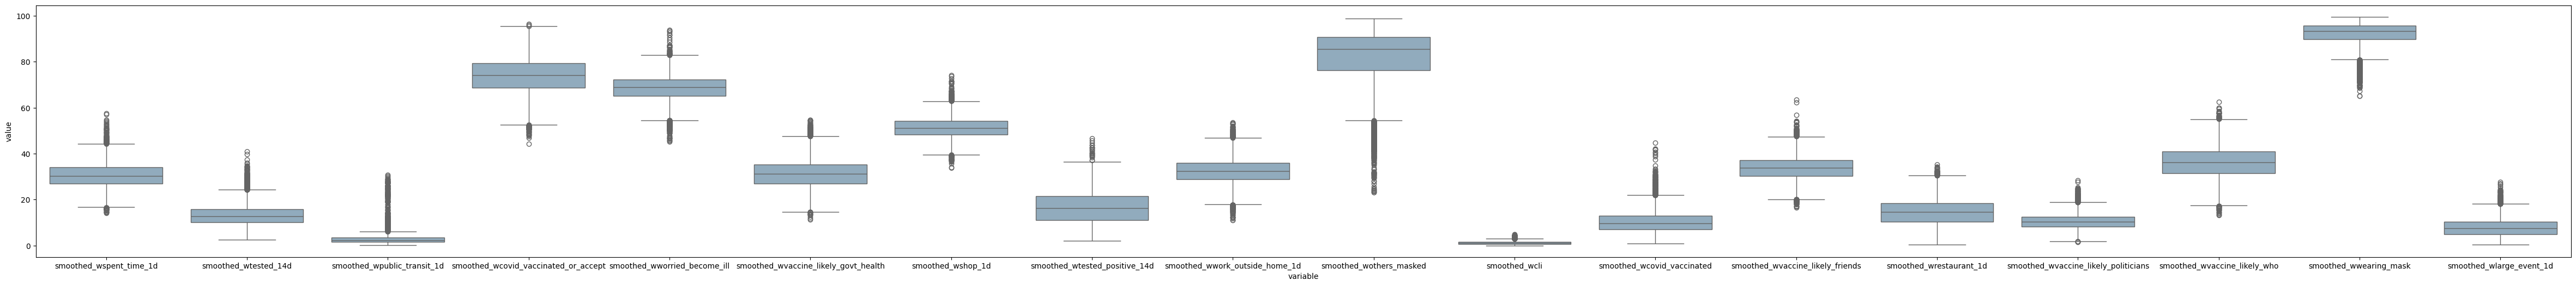

In [14]:
sns.set_palette("twilight")
plt.figure(figsize=(60, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(df.drop(columns = {'time_value','geo_value','State','County Name'})), whis=1.5)

plt.show()

In [15]:
list_feature = []
list_geo_val = []
WINDOW = 5
for a_col in list(df.columns):
    if a_col not in ['time_value','geo_value','State','County Name'
                     ,'day_of_week','rolling_mean','rolling_std','z_score','is_outlier'
                     ,'smoothed_wtested_14d'
                     ]:
        df['rolling_mean'] = (df.groupby('geo_value')[a_col].rolling(window=WINDOW, center=True).mean().reset_index(level=0, drop=True))
        df['rolling_std'] = (df.groupby('geo_value')[a_col].rolling(window=WINDOW, center=True).std().reset_index(level=0, drop=True))
        df['z_score'] = (df[a_col] - df['rolling_mean']) / df['rolling_std']
        df['is_outlier'] = df['z_score'].abs() > 1.96
        if df[df['is_outlier']==True]['geo_value'].nunique() != 0:
            for a_geo_val in df[df['is_outlier']==True]['geo_value'].unique():
                list_feature.append(a_col)
                list_geo_val.append(a_geo_val)
df = df.drop(columns = {"rolling_mean","rolling_std","z_score","is_outlier"})

In [16]:
dict_result = {'geo_val':list_geo_val, 'feature':list_feature}
df_result = pd.DataFrame(dict_result)
df_result

,geo_val,feature


In [17]:
list_feature = []
list_geo_val = []
WINDOW = 3
for a_col in list(df.columns):
    if a_col not in ['time_value','geo_value','State','County Name'
                     ,'day_of_week','rolling_mean','rolling_std','z_score','is_outlier'
                     ,'smoothed_wtested_14d'
                     ]:
        df['rolling_mean'] = (df.groupby('geo_value')[a_col].rolling(window=WINDOW, center=True).mean().reset_index(level=0, drop=True))
        df['rolling_std'] = (df.groupby('geo_value')[a_col].rolling(window=WINDOW, center=True).std().reset_index(level=0, drop=True))
        df['z_score'] = (df[a_col] - df['rolling_mean']) / df['rolling_std']
        df['is_outlier'] = df['z_score'].abs() > 1.96
        if df[df['is_outlier']==True]['geo_value'].nunique() != 0:
            for a_geo_val in df[df['is_outlier']==True]['geo_value'].unique():
                list_feature.append(a_col)
                list_geo_val.append(a_geo_val)
df = df.drop(columns = {"rolling_mean","rolling_std","z_score","is_outlier"})

In [18]:
dict_result = {'geo_val':list_geo_val, 'feature':list_feature}
df_result = pd.DataFrame(dict_result)
df_result

,geo_val,feature


### Distribution

In [19]:
list_skew_cols = []
for a_col in df.drop(columns = {'time_value','geo_value','State','County Name'}).columns:
    skew_val = df['%s'%a_col].skew()
    # print("%s: %s"%(a_col,skew_val))
    if (skew_val > 1) | (skew_val < -1):
        list_skew_cols.append(a_col)
list_skew_cols

['smoothed_wpublic_transit_1d',
 'smoothed_wothers_masked',
 'smoothed_wcovid_vaccinated',
 'smoothed_wwearing_mask']

### Time Series Plot

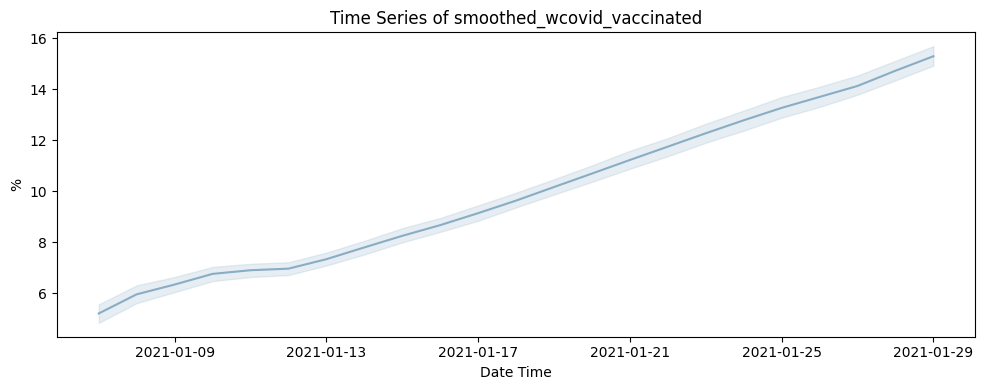

In [20]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='time_value', y='smoothed_wcovid_vaccinated', data=df)
plt.title('Time Series of smoothed_wcovid_vaccinated')
plt.xlabel('Date Time')
plt.ylabel('%')
plt.tight_layout()
plt.show()

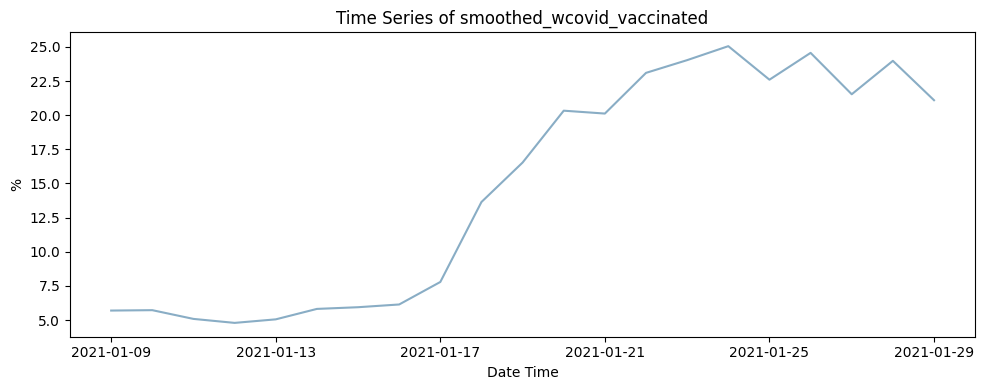

In [21]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='time_value', y='smoothed_wcovid_vaccinated', data=df[df['geo_value']=='10001'])
plt.title('Time Series of smoothed_wcovid_vaccinated')
plt.xlabel('Date Time')
plt.ylabel('%')
plt.tight_layout()
plt.show()

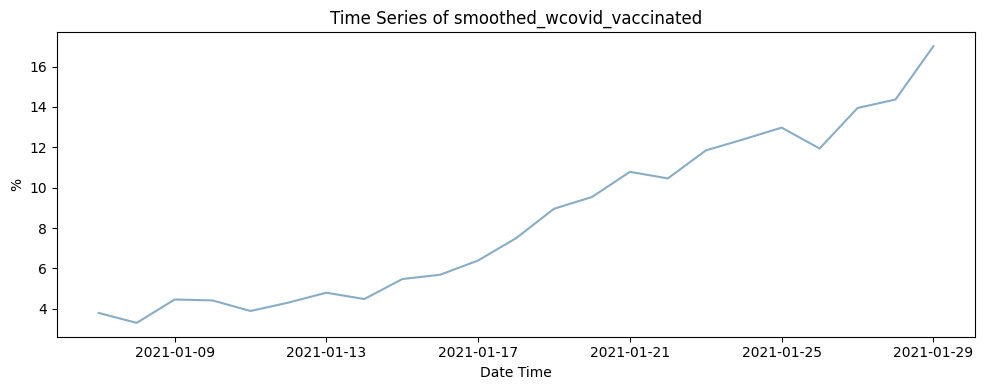

In [22]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='time_value', y='smoothed_wcovid_vaccinated', data=df[df['geo_value']=='10003'])
plt.title('Time Series of smoothed_wcovid_vaccinated')
plt.xlabel('Date Time')
plt.ylabel('%')
plt.tight_layout()
plt.show()

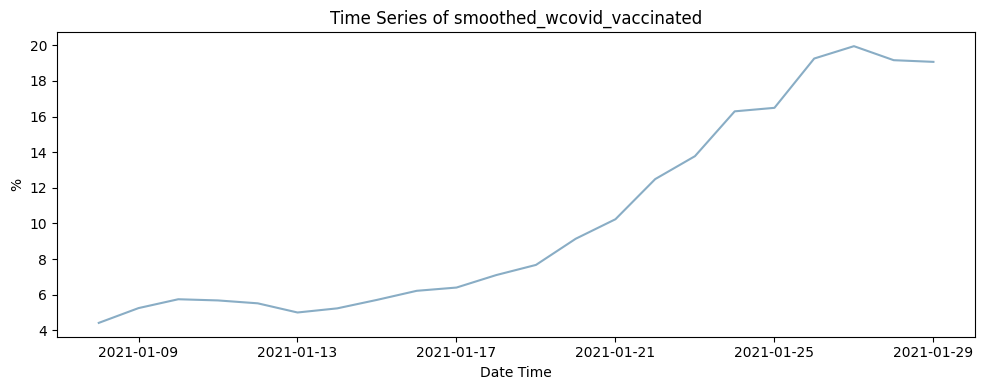

In [23]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='time_value', y='smoothed_wcovid_vaccinated', data=df[df['geo_value']=='10005'])
plt.title('Time Series of smoothed_wcovid_vaccinated')
plt.xlabel('Date Time')
plt.ylabel('%')
plt.tight_layout()
plt.show()

### Week of the day analysis

In [24]:
df['day_of_week'] = df['time_value'].apply(lambda x : x.strftime("%A"))

In [25]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_type = CategoricalDtype(categories=days_order, ordered=True)
df['day_of_week'] = df['day_of_week'].astype(day_type)

# Observed False: Include all categories, even if some are not present in the data.
df_grp_dow = df.groupby('day_of_week', observed=False).agg({'smoothed_wcovid_vaccinated':'mean'}).reset_index()
df_grp_dow

,day_of_week,smoothed_wcovid_vaccinated
0,Monday,10.023213
1,Tuesday,10.298416
2,Wednesday,10.720599
3,Thursday,10.786383
4,Friday,11.031393
5,Saturday,9.522569
6,Sunday,9.803055


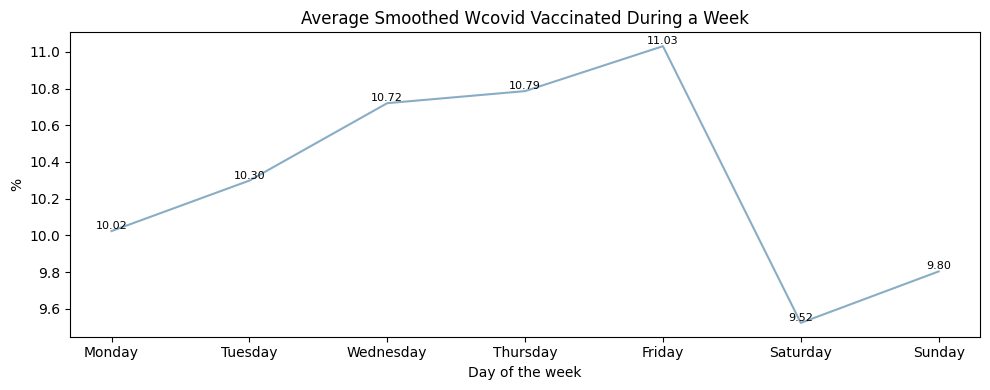

In [26]:
# Plot
plt.figure(figsize=(10, 4))
sns.lineplot(x='day_of_week', y='smoothed_wcovid_vaccinated', data=df_grp_dow)
for i in range(len(df_grp_dow)):
    x = df_grp_dow['day_of_week'].iloc[i]
    y = df_grp_dow['smoothed_wcovid_vaccinated'].iloc[i]
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8)
plt.title('Average Smoothed Wcovid Vaccinated During a Week')
plt.xlabel('Day of the week')
plt.ylabel('%')
plt.tight_layout()
plt.show()

### Null Value

In [27]:
df = df.sort_values(by = ['geo_value','time_value']).reset_index(drop = True)

display(df.head(3))
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,...,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week
0,2021-01-07,10001,28.724102,26.817934,2.484765,61.504053,60.100055,24.831766,49.928366,NaN,...,NaN,27.087597,14.031583,8.974899,29.303109,90.420476,9.137023,Delaware,Kent,Thursday
1,2021-01-08,10001,31.021265,28.708178,3.739310,63.386765,59.247848,25.001046,47.824775,NaN,...,NaN,28.302522,15.470876,10.028503,30.189500,91.177487,9.423685,Delaware,Kent,Friday
2,2021-01-09,10001,30.564677,31.671570,3.529032,62.536156,61.541969,26.712798,48.027841,NaN,...,5.692845,29.742181,14.161936,12.418520,31.979435,91.884639,8.088518,Delaware,Kent,Saturday


Shape : (11983, 23)


In [28]:
df_null = pd.DataFrame(df.isnull().sum(), columns=['NULL']).reset_index()
df_null['%NULL'] = df_null['NULL']*100/df.shape[0]
df_null = df_null.sort_values("%NULL", ascending=False)
df_null

,index,NULL,%NULL
9,smoothed_wtested_positive_14d,10801,90.136026
13,smoothed_wcovid_vaccinated,1165,9.722106
16,smoothed_wvaccine_likely_politicians,1023,8.537094
7,smoothed_wvaccine_likely_govt_health,975,8.136527
17,smoothed_wvaccine_likely_who,968,8.078111
14,smoothed_wvaccine_likely_friends,925,7.719269
11,smoothed_wothers_masked,855,7.135108
6,smoothed_wworried_become_ill,739,6.167070
18,smoothed_wwearing_mask,683,5.699741
5,smoothed_wcovid_vaccinated_or_accept,140,1.168322


In [29]:
df = df.drop(columns = {"smoothed_wtested_positive_14d"})
df.isnull().sum()

time_value                                 0
geo_value                                  0
smoothed_wspent_time_1d                    0
smoothed_wtested_14d                      67
smoothed_wpublic_transit_1d                0
smoothed_wcovid_vaccinated_or_accept     140
smoothed_wworried_become_ill             739
smoothed_wvaccine_likely_govt_health     975
smoothed_wshop_1d                          0
smoothed_wwork_outside_home_1d             0
smoothed_wothers_masked                  855
smoothed_wcli                              0
smoothed_wcovid_vaccinated              1165
smoothed_wvaccine_likely_friends         925
smoothed_wrestaurant_1d                    0
smoothed_wvaccine_likely_politicians    1023
smoothed_wvaccine_likely_who             968
smoothed_wwearing_mask                   683
smoothed_wlarge_event_1d                   0
State                                      0
County Name                                0
day_of_week                                0
dtype: int

In [30]:
df_null_entity = df.drop(columns='geo_value').groupby(df['geo_value']).apply(lambda group: group.isnull().sum()).reset_index()
df_null_entity_melt = pd.melt(df_null_entity, id_vars=['geo_value'], value_vars=[a_col for a_col in df_null_entity if a_col != 'geo_value'], var_name='column_name', value_name='NULL')
df_null_entity_melt['%NULL'] = df_null_entity_melt['NULL'] / df['time_value'].nunique()
df_null_entity_melt

,geo_value,column_name,NULL,%NULL
0,10001,time_value,0,0.0
1,10003,time_value,0,0.0
2,10005,time_value,0,0.0
3,11001,time_value,0,0.0
4,12001,time_value,0,0.0
...,...,...,...,...
10936,55105,day_of_week,0,0.0
10937,55133,day_of_week,0,0.0
10938,55139,day_of_week,0,0.0
10939,56021,day_of_week,0,0.0


In [31]:
list_drop_geo_val = list(df_null_entity_melt[df_null_entity_melt['%NULL']>PERCENT_ENTITY_NULL]['geo_value'].unique())
display(list_drop_geo_val[:10])
print("Len :", len(list_drop_geo_val))

['13115',
 '23017',
 '51165',
 '12131',
 '21093',
 '22005',
 '22109',
 '23003',
 '37027',
 '37155']

Len : 84


In [32]:
df = df[~df['geo_value'].isin(list_drop_geo_val)].reset_index(drop = True)

display(df.head(3))
print("Shape: ", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week
0,2021-01-07,10001,28.724102,26.817934,2.484765,61.504053,60.100055,24.831766,49.928366,26.792493,...,NaN,27.087597,14.031583,8.974899,29.303109,90.420476,9.137023,Delaware,Kent,Thursday
1,2021-01-08,10001,31.021265,28.708178,3.739310,63.386765,59.247848,25.001046,47.824775,29.571606,...,NaN,28.302522,15.470876,10.028503,30.189500,91.177487,9.423685,Delaware,Kent,Friday
2,2021-01-09,10001,30.564677,31.671570,3.529032,62.536156,61.541969,26.712798,48.027841,36.151320,...,5.692845,29.742181,14.161936,12.418520,31.979435,91.884639,8.088518,Delaware,Kent,Saturday


Shape:  (10051, 22)


In [33]:
df_null_entity = df.drop(columns='geo_value').groupby(df['geo_value']).apply(lambda group: group.isnull().sum()).reset_index()
df_null_entity_melt = pd.melt(df_null_entity, id_vars=['geo_value'], value_vars=[a_col for a_col in df_null_entity if a_col != 'geo_value'], var_name='column_name', value_name='NULL')
df_null_entity_melt['%NULL'] = df_null_entity_melt['NULL'] / df['time_value'].nunique()
df_null_entity_melt

,geo_value,column_name,NULL,%NULL
0,10001,time_value,0,0.0
1,10003,time_value,0,0.0
2,10005,time_value,0,0.0
3,11001,time_value,0,0.0
4,12001,time_value,0,0.0
...,...,...,...,...
9172,55087,day_of_week,0,0.0
9173,55105,day_of_week,0,0.0
9174,55133,day_of_week,0,0.0
9175,55139,day_of_week,0,0.0


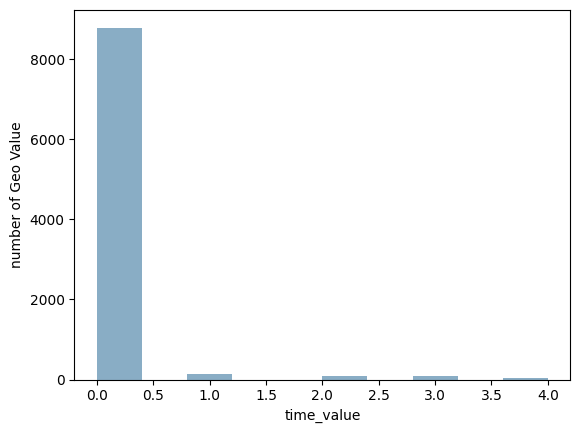

In [34]:
plt.hist(df_null_entity_melt['NULL'])

# Add labels and title
plt.xlabel('time_value')
plt.ylabel('number of Geo Value')

plt.show()

In [35]:
df_null_entity_melt[(df_null_entity_melt['NULL']==4)&(df_null_entity_melt['column_name']=='smoothed_wcovid_vaccinated')].head()

,geo_value,column_name,NULL,%NULL
4849,13117,smoothed_wcovid_vaccinated,4,0.173913
4857,15009,smoothed_wcovid_vaccinated,4,0.173913
4867,17099,smoothed_wcovid_vaccinated,4,0.173913
4880,18035,smoothed_wcovid_vaccinated,4,0.173913
4886,18105,smoothed_wcovid_vaccinated,4,0.173913


In [36]:
df[df['geo_value']=='13117'][['time_value','geo_value','smoothed_wcovid_vaccinated']]

,time_value,geo_value,smoothed_wcovid_vaccinated
966,2021-01-07,13117,NaN
967,2021-01-08,13117,NaN
968,2021-01-09,13117,NaN
969,2021-01-10,13117,NaN
970,2021-01-11,13117,4.515159
971,2021-01-12,13117,4.290056
972,2021-01-13,13117,3.750554
973,2021-01-14,13117,3.277667
974,2021-01-15,13117,5.485875
975,2021-01-16,13117,6.035088


In [37]:
for a_col in df.columns:
    if a_col not in ['time_value','geo_value','State','County Name','day_of_week']:
        df['%s'%a_col] = df.groupby('geo_value')['%s'%a_col].ffill()
df.isnull().sum()

time_value                                0
geo_value                                 0
smoothed_wspent_time_1d                   0
smoothed_wtested_14d                      0
smoothed_wpublic_transit_1d               0
smoothed_wcovid_vaccinated_or_accept      0
smoothed_wworried_become_ill              1
smoothed_wvaccine_likely_govt_health      0
smoothed_wshop_1d                         0
smoothed_wwork_outside_home_1d            0
smoothed_wothers_masked                   4
smoothed_wcli                             0
smoothed_wcovid_vaccinated              702
smoothed_wvaccine_likely_friends          0
smoothed_wrestaurant_1d                   0
smoothed_wvaccine_likely_politicians      0
smoothed_wvaccine_likely_who              0
smoothed_wwearing_mask                    3
smoothed_wlarge_event_1d                  0
State                                     0
County Name                               0
day_of_week                               0
dtype: int64

In [38]:
df_null_entity = df.drop(columns='geo_value').groupby(df['geo_value']).apply(lambda group: group.isnull().sum()).reset_index()
df_null_entity_melt = pd.melt(df_null_entity, id_vars=['geo_value'], value_vars=[a_col for a_col in df_null_entity if a_col != 'geo_value'], var_name='column_name', value_name='NULL')
df_null_entity_melt['%NULL'] = df_null_entity_melt['NULL'] / df['time_value'].nunique()
df_null_entity_melt

,geo_value,column_name,NULL,%NULL
0,10001,time_value,0,0.0
1,10003,time_value,0,0.0
2,10005,time_value,0,0.0
3,11001,time_value,0,0.0
4,12001,time_value,0,0.0
...,...,...,...,...
9172,55087,day_of_week,0,0.0
9173,55105,day_of_week,0,0.0
9174,55133,day_of_week,0,0.0
9175,55139,day_of_week,0,0.0


In [39]:
df_null_entity_melt[df_null_entity_melt['NULL']>3].sample()

,geo_value,column_name,NULL,%NULL
4967,27145,smoothed_wcovid_vaccinated,4,0.173913


In [40]:
df[df['geo_value']=='37179'][['time_value','geo_value','smoothed_wcovid_vaccinated']]

,time_value,geo_value,smoothed_wcovid_vaccinated
5934,2021-01-07,37179,NaN
5935,2021-01-08,37179,NaN
5936,2021-01-09,37179,NaN
5937,2021-01-10,37179,NaN
5938,2021-01-11,37179,5.524393
5939,2021-01-12,37179,6.289898
5940,2021-01-13,37179,7.284272
5941,2021-01-14,37179,7.586888
5942,2021-01-15,37179,8.165334
5943,2021-01-16,37179,5.943707


In [41]:
df = df.dropna()
df.isnull().sum()

time_value                              0
geo_value                               0
smoothed_wspent_time_1d                 0
smoothed_wtested_14d                    0
smoothed_wpublic_transit_1d             0
smoothed_wcovid_vaccinated_or_accept    0
smoothed_wworried_become_ill            0
smoothed_wvaccine_likely_govt_health    0
smoothed_wshop_1d                       0
smoothed_wwork_outside_home_1d          0
smoothed_wothers_masked                 0
smoothed_wcli                           0
smoothed_wcovid_vaccinated              0
smoothed_wvaccine_likely_friends        0
smoothed_wrestaurant_1d                 0
smoothed_wvaccine_likely_politicians    0
smoothed_wvaccine_likely_who            0
smoothed_wwearing_mask                  0
smoothed_wlarge_event_1d                0
State                                   0
County Name                             0
day_of_week                             0
dtype: int64

In [42]:
df['time_value_shift_1'] = df.groupby('geo_value')['time_value'].shift(1)

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week,time_value_shift_1
2,2021-01-09,10001,30.564677,31.671570,3.529032,62.536156,61.541969,26.712798,48.027841,36.151320,...,29.742181,14.161936,12.418520,31.979435,91.884639,8.088518,Delaware,Kent,Saturday,NaT
3,2021-01-10,10001,28.771539,30.455099,3.386760,63.258488,59.657602,28.732035,48.997453,36.207953,...,31.253956,12.912095,12.667990,32.232582,92.625535,7.548629,Delaware,Kent,Sunday,2021-01-09
4,2021-01-11,10001,27.648192,32.652473,2.836477,64.020938,62.971697,28.824431,49.233749,34.277144,...,34.085365,12.258112,14.202718,32.396997,94.077965,7.615596,Delaware,Kent,Monday,2021-01-10
5,2021-01-12,10001,27.626437,29.695810,2.245193,61.460460,59.611104,28.867446,45.176114,37.305956,...,32.053915,10.875929,14.906447,32.210709,97.007237,4.863392,Delaware,Kent,Tuesday,2021-01-11
6,2021-01-13,10001,29.008665,26.041461,2.355360,64.432266,56.863993,29.842478,45.557870,39.091765,...,34.895821,10.499761,16.037263,30.476403,96.629968,5.108643,Delaware,Kent,Wednesday,2021-01-12


Shape : (9349, 23)


In [43]:
df['day_shift'] = df['time_value'] - df['time_value_shift_1']

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week,time_value_shift_1,day_shift
2,2021-01-09,10001,30.564677,31.671570,3.529032,62.536156,61.541969,26.712798,48.027841,36.151320,...,14.161936,12.418520,31.979435,91.884639,8.088518,Delaware,Kent,Saturday,NaT,NaT
3,2021-01-10,10001,28.771539,30.455099,3.386760,63.258488,59.657602,28.732035,48.997453,36.207953,...,12.912095,12.667990,32.232582,92.625535,7.548629,Delaware,Kent,Sunday,2021-01-09,1 days
4,2021-01-11,10001,27.648192,32.652473,2.836477,64.020938,62.971697,28.824431,49.233749,34.277144,...,12.258112,14.202718,32.396997,94.077965,7.615596,Delaware,Kent,Monday,2021-01-10,1 days
5,2021-01-12,10001,27.626437,29.695810,2.245193,61.460460,59.611104,28.867446,45.176114,37.305956,...,10.875929,14.906447,32.210709,97.007237,4.863392,Delaware,Kent,Tuesday,2021-01-11,1 days
6,2021-01-13,10001,29.008665,26.041461,2.355360,64.432266,56.863993,29.842478,45.557870,39.091765,...,10.499761,16.037263,30.476403,96.629968,5.108643,Delaware,Kent,Wednesday,2021-01-12,1 days


Shape : (9349, 24)


In [44]:
df[df['day_shift']>pd.Timedelta(days=1)]

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week,time_value_shift_1,day_shift


In [45]:
df = df.drop(columns = {'time_value_shift_1','day_shift'})

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week
2,2021-01-09,10001,30.564677,31.671570,3.529032,62.536156,61.541969,26.712798,48.027841,36.151320,...,5.692845,29.742181,14.161936,12.418520,31.979435,91.884639,8.088518,Delaware,Kent,Saturday
3,2021-01-10,10001,28.771539,30.455099,3.386760,63.258488,59.657602,28.732035,48.997453,36.207953,...,5.721060,31.253956,12.912095,12.667990,32.232582,92.625535,7.548629,Delaware,Kent,Sunday
4,2021-01-11,10001,27.648192,32.652473,2.836477,64.020938,62.971697,28.824431,49.233749,34.277144,...,5.081410,34.085365,12.258112,14.202718,32.396997,94.077965,7.615596,Delaware,Kent,Monday
5,2021-01-12,10001,27.626437,29.695810,2.245193,61.460460,59.611104,28.867446,45.176114,37.305956,...,4.789884,32.053915,10.875929,14.906447,32.210709,97.007237,4.863392,Delaware,Kent,Tuesday
6,2021-01-13,10001,29.008665,26.041461,2.355360,64.432266,56.863993,29.842478,45.557870,39.091765,...,5.048679,34.895821,10.499761,16.037263,30.476403,96.629968,5.108643,Delaware,Kent,Wednesday


Shape : (9349, 22)


In [46]:
df.isnull().sum()

time_value                              0
geo_value                               0
smoothed_wspent_time_1d                 0
smoothed_wtested_14d                    0
smoothed_wpublic_transit_1d             0
smoothed_wcovid_vaccinated_or_accept    0
smoothed_wworried_become_ill            0
smoothed_wvaccine_likely_govt_health    0
smoothed_wshop_1d                       0
smoothed_wwork_outside_home_1d          0
smoothed_wothers_masked                 0
smoothed_wcli                           0
smoothed_wcovid_vaccinated              0
smoothed_wvaccine_likely_friends        0
smoothed_wrestaurant_1d                 0
smoothed_wvaccine_likely_politicians    0
smoothed_wvaccine_likely_who            0
smoothed_wwearing_mask                  0
smoothed_wlarge_event_1d                0
State                                   0
County Name                             0
day_of_week                             0
dtype: int64

In [47]:
df.to_pickle("cleaned_train_dataset.pkl")